# Práctica 2: Aprendizaje automático

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de __2 notebooks__ que se entregarán en las tareas de entrega habilitadas en el Campus Virtual. Este notebook corresponde al apartado de __clasificación__.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: J__

__Nombres de los estudiantes: Damián Benasco Sánchez y Diego Martínez López__

# Apartado 2: Regresión

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality).

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino.

La calidad del vino es una variable que toma valores entre 0 y 10.

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal.

## 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe.

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [7]:
df_csv = pd.read_csv('calidad_vinos.csv')
df_csv

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
df_csv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Vamos a calcular el Coeficiente de Variación (varianza/media) para cada variable y así poder analizar la dispersión sin necesidad de interpretar las unidades. La variable con mayor Coeficiente de Variación será la más dispersa y la que tenga menor la más concentrada respecto de la media.

In [12]:
cv = df_csv.std() / df_csv.mean()
cv.sort_values(ascending=False)

citric acid             0.718888
total sulfur dioxide    0.707917
free sulfur dioxide     0.658911
residual sugar          0.555351
chlorides               0.538095
volatile acidity        0.339244
sulphates               0.257551
fixed acidity           0.209276
quality                 0.143287
alcohol                 0.102242
pH                      0.046627
density                 0.001893
dtype: float64

Como podemos observar, la variable con mayor Coeficiente de Variación es citric acid y la menor es density. Como explicamos anteriormente, esto significa que la variable citric acid toma valores mucho más acusados respecto a la media mientras que la densidad toma valores mucho más concentrados en torno a la media. Esto hace que la media de la densidad sea mucho más respresentativa comparado con la del citric acid, ya que la media se ve muy afectada por la presencia de valores extremos.

Las variables con valores extremos, como citric acid, pueden provocar problemas de convergencia en el entrenamiento de la red neuronal, puesto que al calcular el error en cada paso de entrenamiento mediante el descenso por gradiente, ya que que el gradiente es muy fuerte para esa variable, y el MLP acaba dando demasiada importancia a ella. Asimismo, de nuevo debido al gradiente, valores muy extremos pueden hacer que el modelo tarde más en converger o diverja durante el entrenamiento, y por otro lado, las diferencias de escala entre variables pueden hacer que el MLP tenga que esforzarse en "nivelar" la importancia de cada entrada. Para solucionar esto podemos normalizar o estandarizar la variable, con métodos como el StandardScaler o MinMaxScaler.
Por otro lado, en cuanto a las variables con poca variabilidad, como todas están muy próximas a la media, estas no aportan demasiada información, por lo que el MLP podría llegar a aprender a ignorarlo. Además, estas varibles podrían llegar a considerarse como "ruido", o generar redundancia si están correlacionadas con otras variables. Esto puede hacer que haya colinealidad, y el modelo no sea capaz de distinguir bien el efecto de cada variable, y en algunos casos, esto puede dificultar el aprendizaje y la interpretación. Una vez detallado esto, es preciso recalcar que podemos o bien dejar estas variables que aportan poca información o bien eliminarlas. Ahora bien, deberíamos dejarlas si están correlacionada significativamente con la variable objetivo o bien aportan algo al modelo, mientras que deberíamos eliminarlas si tienen muy baja varianza, no muestra correlación con quality o bien generan ruido o ralentiza el entrenamiento.

Procedemos ahora a analizar la distribución de la variable de la calidad del vino, viendo los datos sobre varianza, media etc. 

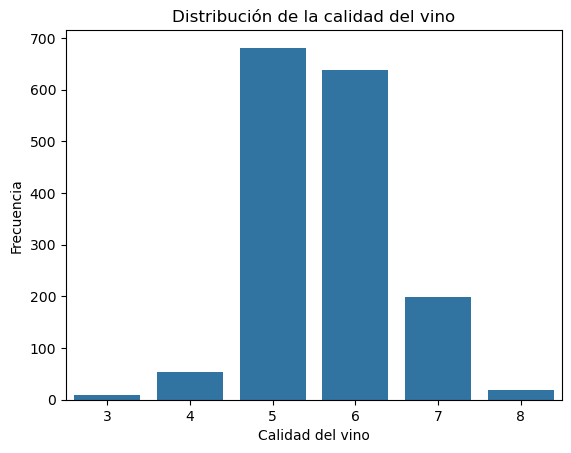

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='quality', data=df_csv)
plt.title('Distribución de la calidad del vino')
plt.xlabel('Calidad del vino')
plt.ylabel('Frecuencia')
plt.show()

Como podemos observar en el histograma, la mayoría de los vinos tienen una calidad de 5 o 6, por lo que la gran mayoría de vinos se sitúan en torno a la media. Esto concuerda con nuestro coeficiente de variación calculado anteriormente, donde veíamos que la calidad tenía un coeficiente de  0.143287, lo cual indica que la mayoría de los datos se sitúan en torno a la media.
Además, si observamos la tabla con los estadísticos, vemos que la media de la calidad se sitúa en torno al 5.6, y que la variación es relativamente baja, situándose en torno a 0.80.
Esto evidencia de nuevo una media muy representativa de los vinos en cuanto a la calidad y que se trata de vinos con una calidad media, pues recordemos que la calidad del vino se mide sobre 10.
En conclusión, la calidad del vino tiene una distribución concentrada en torno a 5 y 6, con pocas observaciones en extremos (3, 4, 7, 8), lo cual puede afectar al rendimiento de modelos clasificadores si no se compensa el desbalance.
En regresión, el modelo tenderá a predecir valores cercanos a la media, a menos que los extremos estén bien representados

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga la calidad del vino y, selecciona las variables que estén más correlacionadas con él (estableciendo para ello un valor umbral que consideres adecuado).

Calculamos en primer lugar los coeficientes de correlación entre la variable de salida y el resto de variables.

In [22]:
correlation = df_csv.corr(method='pearson')
cor_with_quality = correlation['quality'].drop('quality')
cor_with_quality

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

Como podemos observar las variables con mayor correlación con la calidad son, de manera positiva el alcohol (que es la que más correlación tiene con un índice de Pearson de 0.48),  los sulfatos (con una correlación de 0.25) y el ácido cítrico (con una correlación de 0.22),  por lo que a mayor valor de estas variables mayor es la calidad del vino. Por otro lado las variables con mayor correlación negativa con la calidad son la acidad volátil (siendo la variable con mayor correlación negativa con respecto a la calidad, con un índice de Pearson de -0.40), el índice de dióxido de sufuro total ( con un índice de -0.18) y la densidad (con un índice de -0.17), por lo cual a mayor valor de estas variables menor calidad del vino.
Vamos a establecer el umbral de correlación a >= 0.15 en valor absoluto, y procederemos a crear un nuevo dataframe con la calidad del vino y estas variables que son las más correlacionadas con él.

In [25]:
cor_df = cor_with_quality.to_frame(name='correlation')
cor_df['abs_correlation'] = cor_df['correlation'].abs()

# Filtra variables con correlación absoluta mayor o igual a 0.1
selected = cor_df[cor_df['abs_correlation'] >= 0.15].sort_values(by='abs_correlation', ascending=False)

print(selected)

                      correlation  abs_correlation
alcohol                  0.476166         0.476166
volatile acidity        -0.390558         0.390558
sulphates                0.251397         0.251397
citric acid              0.226373         0.226373
total sulfur dioxide    -0.185100         0.185100
density                 -0.174919         0.174919


En conclusión, podemos observar de nuevo en esta tabla las variables más correlacionadas con las de salida, que es la calidad del vino, y su correlación con la misma.

## 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


En primer lugar, cabe destacar que los datos de entrada deben normalizarse o estandarizarse casi siempre en redes neuronales pues las entradas llegan directamente a las funciones de activación y si las variables están en distintas escalas, los pesos del modelo se desbalancean, pudiendo ralentizar o incluso bloquear el aprendizaje
Además, nuestros datos toman escalas muy distintas, como podemos ver por ejemplo comparando la densidad, que toma valores de como máximo 1 (en sus unidades de medida) mientras que por ejemplo el total sulfur dioxide puede tomar valores de hasta 289.
Por ello, hemos decidido estandarizar, primero porque los datos toman escalas muy diferentes, y por otra parte porque para redes neuronales tiene ventajas como que funciona bien con datos distribuidos de forma más o menos normal y que es ideal para algoritmos que dependen de gradientes, como es el caso de las redes neuronales multicapa.
Así, procedemos ha hacer la estadarización de las variables seleccionadas en el punto 2.

In [30]:
selected_features = [
    'alcohol',
    'sulphates',
    'citric acid',
    'volatile acidity',
    'total sulfur dioxide',
    'density'
]

In [32]:
from sklearn.preprocessing import StandardScaler

# Selección de las variables que sí queremos normalizar
X = df_csv[selected_features]

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)
X_scaled_df

,alcohol,sulphates,citric acid,volatile acidity,total sulfur dioxide,density
0,-0.960246,-0.579207,-1.391472,0.961877,-0.379133,0.558274
1,-0.584777,0.128950,-1.391472,1.967442,0.624363,0.028261
2,-0.584777,-0.048089,-1.186070,1.297065,0.229047,0.134264
3,-0.584777,-0.461180,1.484154,-1.384443,0.411500,0.664277
4,-0.960246,-0.579207,-1.391472,0.961877,-0.379133,0.558274
...,...,...,...,...,...,...
1594,0.072294,-0.461180,-0.980669,0.403229,-0.075043,-0.978765
1595,0.729364,0.601055,-0.877968,0.123905,0.137820,-0.862162
1596,0.541630,0.542042,-0.723916,-0.099554,-0.196679,-0.533554
1597,-0.209308,0.305990,-0.775267,0.654620,-0.075043,-0.676657


## 4) Primer modelo: kNN

Antes de pasar a crear las redes neuronales, vamos crear unos primeros modelos más sencillos para comparar. Para ello:

- Crea varios modelos kNN con distintos valores de k (de 2 a 20 vecinos)
- Calcula el MSE de cada uno de ellos, utilizando validación cruzada, para elegir el mejor valor de k

Para elegirlo, pinta el gráfico de MSE para los distintos valores de k.

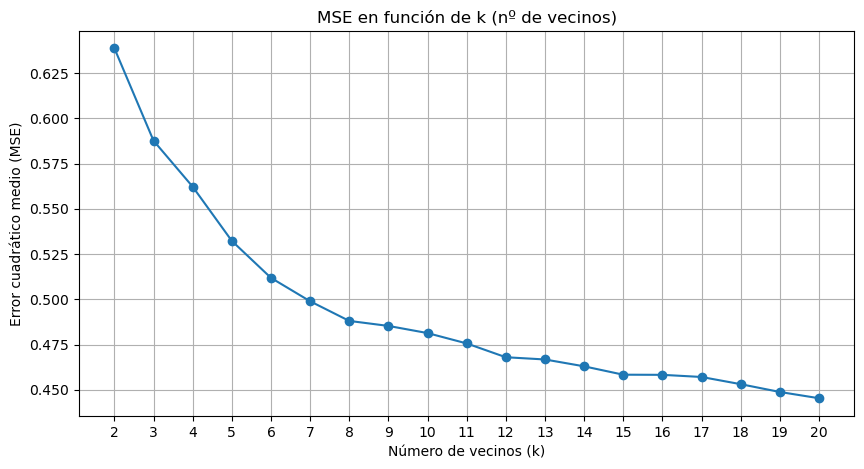

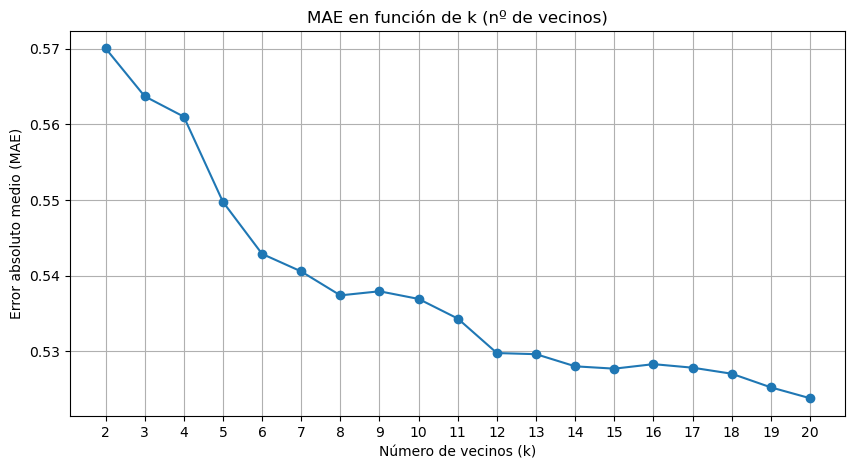

El mejor valor de k es 20 para el MSE (0.4454) y para el MAE es 20 (0.5238)


In [142]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Variable objetivo (cambia 'target' por el nombre correcto de tu variable objetivo)
y = df_csv['quality']  #guardamos la columna que es la variable objetivo 

mse_scores = []
mae_scores = []
k_values = range(2, 21)
#cv = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # cross_val_score devuelve puntuaciones negativas del MSE, así que se multiplica por -1
    mse = -cross_val_score(knn, X_scaled_df, y, scoring='neg_mean_squared_error', cv=10).mean()
    mae = -cross_val_score(knn, X_scaled_df, y, scoring='neg_mean_absolute_error', cv=10).mean()
    mse_scores.append(mse)
    mae_scores.append(mae)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(k_values, mse_scores, marker='o')
plt.title('MSE en función de k (nº de vecinos)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Error cuadrático medio (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_values, mae_scores, marker='o')
plt.title('MAE en función de k (nº de vecinos)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Error absoluto medio (MAE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Mejor valor de k
best_k_mse = k_values[np.argmin(mse_scores)]
best_k_mae = k_values[np.argmin(mae_scores)]
print(f"El mejor valor de k es {best_k_mse} para el MSE ({min(mse_scores):.4f}) y para el MAE es {best_k_mae} ({min(mae_scores):.4f})")


Podemos observar claramente que el mejor valor de k es 20 con un error cuadrático medio de 0.4454 y un error absoluto medio de 0.5238 (el mínimo en ambos casos). Además, cabe destacar que hemos usado el entrenamiento de KNN con la k variando de 2 a 20 y hemos usado validación cruzada con 10 partes.
Hemos recopilado los datos de cada uno de los entrenamientos usando un bucle for, y posteriormente hemos graficado los resultados como se ve en el diagrama de arriba extrayendo el valor de k con menor MSE.

## 5) Redes neuronales: Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica.

Una vez tengas la curva de aprendizaje:
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.

In [41]:
RANDOM_STATE=333

In [43]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

# Lista de valores alpha a probar, en este caso probamos de 1e^-5 hasta 1e^10
alphas = np.arange(0.1, 2.1, step=0.2) #np.logspace(-5, 1, 20)  # De 1e-5 a 20
#regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]

# Variable objetivo
y = df_csv['quality']  # Guardamos la variable objetivo en y

Creamos en primer lugar la primera de las redes neuronales como se nos indica, con una capa oculta de 250 neuronas. Además, vamos recorriendo los valores de alpha para ir avanzando en el entrenamiento e ir calculando el error cuadrático medio mediante validación cruzada con 10 partes.

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

In [48]:
mse_means_1 = []
mse_stds_1 = []

for alpha in alphas:
    mlp_1 = MLPRegressor(hidden_layer_sizes=(250,), alpha=alpha, max_iter=5000, random_state=RANDOM_STATE)
    scores = -cross_val_score(mlp_1, X_scaled_df, y, scoring='neg_mean_squared_error', cv=10)
    mse_means_1.append(np.mean(scores))
    mse_stds_1.append(np.std(scores))

Procedemos ahora a graficar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. Es decir procedemos con los datos obtenidos para el entrenamiento del modelo, a graficar la curva de aprendizaje.

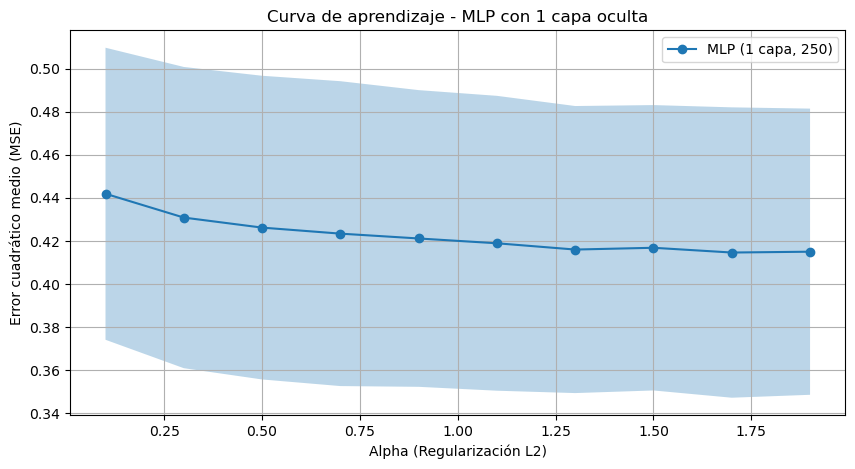

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(alphas, mse_means_1, marker='o', label='MLP (1 capa, 250)')
plt.fill_between(alphas,
                 np.array(mse_means_1) - np.array(mse_stds_1),
                 np.array(mse_means_1) + np.array(mse_stds_1),
                 alpha=0.3)


plt.xlabel('Alpha (Regularización L2)')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Curva de aprendizaje - MLP con 1 capa oculta')
plt.grid(True)
plt.legend()
plt.show()


Procedemos ahora a entrenar a otra red neuronal con 250 neuronas, pero esta vez distribuidas de manera diferente. Así, vamos a probar un modelo con dos capas ocultas de 100 neuronas y otra oculta  de 50.

In [54]:
mse_means_1 = []
mse_stds_1 = []

for alpha in alphas:
    mlp_1 = MLPRegressor(hidden_layer_sizes=(100,100,50), alpha=alpha, max_iter=5000, random_state=RANDOM_STATE)
    scores = -cross_val_score(mlp_1, X_scaled_df, y, scoring='neg_mean_squared_error', cv=20)
    mse_means_1.append(np.mean(scores))
    mse_stds_1.append(np.std(scores))

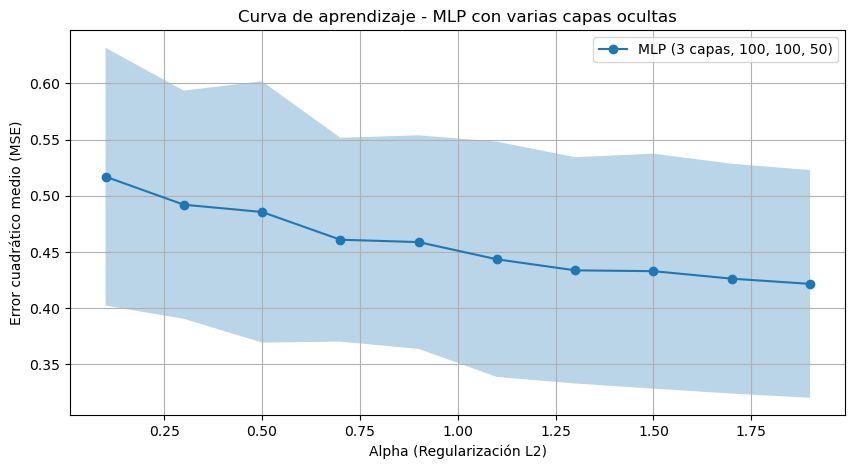

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(alphas, mse_means_1, marker='o', label='MLP (3 capas, 100, 100, 50)')
plt.fill_between(alphas,
                 np.array(mse_means_1) - np.array(mse_stds_1),
                 np.array(mse_means_1) + np.array(mse_stds_1),
                 alpha=0.3)


plt.xlabel('Alpha (Regularización L2)')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Curva de aprendizaje - MLP con varias capas ocultas')
plt.grid(True)
plt.legend()
plt.show()

Comentarios (Hay que terminarlo):

__Curva 1 (MLP con 1 capa oculta (250 neuronas))__
- Vemos que el MSE disminuye muy ligeramente a medida que aumenta alpha, presentándose el mayor cambio en los primeros alphas, luego comienza a estabilizarse alrededor de alpha  ≈ 1.25 con un MSE cercano a 0.44.

- El área sombreada que representa la desviación es estrecha y varía de forma más suave lo que puede representar un comportamiento más estable y consistente.


Este modelo es estable y consistente.

No mejora drásticamente con la regularización, pero no se descontrola.

Ideal si buscas robustez y baja varianza.

__Curva 2 (MLP con 3 capas (100, 100 y 50 neuronas))__
- Observamos que el MSE disminuye significativamente a medida que incrementamos el alpha

- El margen de desviación es más amplio y menos regular respecto de los alphas cuando lo comparamos con la curva anterior, sobre todo con alphas pequeños. Esto puede indicar un comportamiento más volátil.

- Tenemos una mejora progresiva a medida que incrementamos el alpha hasta que empieza a estabilizarse alrededor de alpha ≈ 1.5 con un MSE también cercano a 0.44.

Debido a la pendiente más pronunciada de la curva, podríamos afirmar que este modelo tiene un mayor potencial de aprendizaje pero como comentamos tiene un comportamiento más volátil, lo que hace que cobre mayor importancia la regularización adecuada de los datos.

Con alphas pequeños, sobreajusta o no converge bien dándonos dicha inestabilidad, pero a partir de cierto alpha mejora al modelo de 1 capa.

__Decisión__

A pesar de la inestabilidad que presenta para alphas pequeños el segundo modelo, elegiríamos finalmente este debido a que acaba presentando un MSE menor y tomando un alpha alrededor de 1.75 no tenemos esa volatilidad presente en los alphas menores y la desviación solo es ligeramente superior a la del primer modelo.

El modelo de 1 capa es más regular y estable pero también presenta un MSE ligeramente más elevado. Si tuvieramos pocos datos elegiríamos este ya que no podríamos fiarnos de la inestabilidad del segundo, pero si somos capaces de regular correctamente los datos, el de múltiples capas consigue un resultado mejor.

## 6) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada.

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones.
- Compara los resultados obtenidos (al menos MSE) con el mejor modelo de kNN.

Primero usemos cross_val_predict para realizar la predicción de la calidad de todos los vinos con la red neuronal con dos capas ocultas de 100 neuronas y una de 50.

In [81]:
from sklearn.model_selection import cross_val_predict

mlp_best = MLPRegressor(hidden_layer_sizes=(100,100,50), alpha=alpha, max_iter=5000, random_state=RANDOM_STATE)

# Predicción de la calidad de todos los vinos usando validación cruzada
y_pred = cross_val_predict(mlp_best, X_scaled_df, y, cv=10)

Calculemos el Mean Squared Error, el Mean Absolute Error y el score r2 de la predicción frente la valoración real.

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.4230
MAE: 0.5053
R²: 0.3511


Observamos que tanto el MSE como el MAE rondan el 0.5, error que consideramos aceptable teniendo en cuenta que estamos trabajando con una escala de 0 a 10. 

Por otro lado, tenemos un R2 de 0.3511, este estadístico es el coeficiente de determinación y mide como de bien nuestro modelo se ajusta y predice la realidad (los datos dados). Un valor de 1 indica que el modelo predice perfectamente todos los valores y un valor de 0 nos dice que el modelo es igual de bueno que predecir la media.

En nuestro caso concreto, tenemos un valor de 0.35 lo cuál indica que el modelo es capaz de explicar el 35.11% de la variabilidad de la calidad del vino. Este es un valor moderado que nos indica que el modelo es capaz de detectar patrones en los datos, pero hay gran parte de la variabilidad que no está consiguiendo ser explicada todavía.

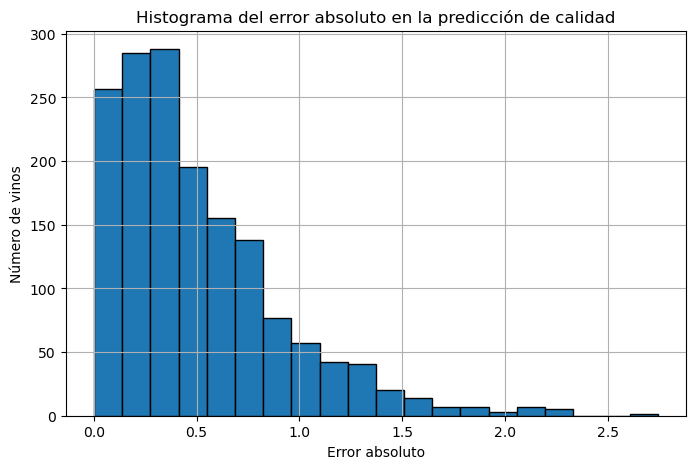

In [92]:
#Calculamos el vector de valores absolutos
error_abs = np.abs(y - y_pred)

plt.figure(figsize=(8,5))

#Hacemos el histograma dividiendo los datos en 20 barras
plt.hist(error_abs, bins=20, edgecolor='black')

plt.title('Histograma del error absoluto en la predicción de calidad')
plt.xlabel('Error absoluto')
plt.ylabel('Número de vinos')
plt.grid(True)
plt.show()

Observamos que el grueso de errores están alrededor de 0.5 de error siendo muy pocos los que ya pasan del 1. Podemos afirmar que el modelo predice adecuadamente la calidad de los vinos ya que consideramos que un error de aproximadamente 0.5 no es un error significativo cuando estamos tratando en una escala de 0 a 10. Calculemos los estadísticos del error agrupando los vinos por su calidad para ver si podemos extraer alguna conclusión y viendo para que vinos falla más.

In [125]:
df_erroresSegunCalidad = pd.DataFrame({'calidad_real': y, 'calidad_prediccion': y_pred, 'error_abs':error_abs })
errores_agrupados = df_erroresSegunCalidad.groupby('calidad_real')['error_abs'].describe()
errores_agrupados

,count,mean,std,min,25%,50%,75%,max
calidad_real,,,,,,,,
3,10.0,1.981535,0.393424,1.335562,1.775117,1.905271,2.185169,2.743460
4,53.0,1.311676,0.433436,0.268064,1.046920,1.280672,1.482684,2.242370
5,681.0,0.396808,0.317316,0.001555,0.161978,0.317764,0.540244,2.290599
6,638.0,0.415239,0.274174,0.002926,0.204113,0.360021,0.607148,1.414529
7,199.0,0.780471,0.415270,0.010282,0.455754,0.745632,1.062627,2.105908
8,18.0,1.561149,0.332184,0.902653,1.281531,1.585127,1.842834,2.062819


Como la varianza de cada grupo es baja podemos analizar en base a la media. Vemos claramente que los grupos con medias mayores son de los grupos de vinos que tenemos menos individuos. Luego probablemente el modelo no predice correctamente estos vinos por falta de datos que le permitan entrenar correctamente ya que hay una relación inversamente proporcional entre la media del error y el número de individuos que tenemos de cada grupo.

Por esto, parece que el modelo funciona correctamente si se le proporcionan los suficientes datos para que sea capaz de entrenarse. Proporcionándole un mayor número de individuos de los grupos de calidad 3, 4 y 8 seríamos capaces de bajar significativamente el error a la hora de predecirlos.

__Comparación de errores con kNN__

Recordamos que el mejor valor que obtuvimos para kNN fue un error cuadrático medio de 0.4454 (k=20), y el valor que nos da para este este modelo es 0.4230.

Vemos que el MLP supera ligeramente al kNN. Sabemos que de forma general el MLP es capaz de modelar relaciones no lineales con una mayor facilidad que otros modelos como kNN. A pesar de que esta diferencia no es demasiado significativa, es útil saber que el MLP predice ligeramente mejor por si quisieramos escalar las aplicaciones a otros conjuntos de datos o ampliando el ya existente (reforzando los grupos mencionados anteriormente).

Que el kNN de unos resultados de error tan próximos a MLP, puede deberse al filtrado de variables que hicimos en los primeros apartados tras el análisis de la correlación de las distintas variables con la variable objetivo (calidad).

Nuestro MLP dió un Error Absoluto Medio de 0.5053 mientras que el kNN con k=20 tuvo 0.5238. De nuevo, el MLP tiene un error ligeramente menor, luego esto reafirma las conclusiones tomadas.